### Edgar Moises Hernandez-Gonzalez
#### Asesores: Pilar Gomez-Gil, Erik Bojorges-Valdez
#### Instituto Nacional de Astrofísica Óptica y Electrónica (INAOE)
#### 25/07/20-24/11/20
#### Tesis: Clasificación de señales EEG basada en representaciones bidimensionales y redes neuronales convolucionales
#### Imagen de escalograma con CWT de EEG de BCI competition II dataset III

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
import cv2

In [ ]:
# importar un canal de una muestra
#la muestra 2 es mano derecha para el train del sujeto 1
# canal C3 (canal 1)
# canal C4 (canal 3) (usar este)
canal = pd.read_csv("MIEEG_train.csv", header=None).iloc[1, 1536:2304]

In [ ]:
canal.shape

(768,)

(512,)


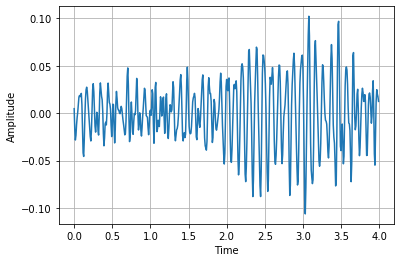

In [ ]:
# 6 segundos con fs=128Hz
fs = 128
time = np.arange(0, 4, 1/fs)
sig = canal[64:576]
print(sig.shape)

plt.plot(time, sig)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
# calcular las escalas de 8-30Hz con pasos de 0.5Hz para complex Morlet wavelets
# f = scale2frequency(wavelet, scale)/sampling_period
escalas = pywt.scale2frequency('cmor3-3', np.arange(8,30.5,0.5)) / (1/fs)
print(escalas)

[48.         45.17647059 42.66666667 40.42105263 38.4        36.57142857
 34.90909091 33.39130435 32.         30.72       29.53846154 28.44444444
 27.42857143 26.48275862 25.6        24.77419355 24.         23.27272727
 22.58823529 21.94285714 21.33333333 20.75675676 20.21052632 19.69230769
 19.2        18.73170732 18.28571429 17.86046512 17.45454545 17.06666667
 16.69565217 16.34042553 16.         15.67346939 15.36       15.05882353
 14.76923077 14.49056604 14.22222222 13.96363636 13.71428571 13.47368421
 13.24137931 13.01694915 12.8       ]


In [ ]:
# Escalograma (CWT)
# pywt.cwt(senal, escalas, tipo wavelet, periodo de muestreo = (1 / fs))
coef, freqs = pywt.cwt(sig, escalas, 'cmor3-3', sampling_period = (1 / fs))

In [ ]:
# dado que cmor3-3 genera numeros complejos, calcular el modulo
# la formula del modulo se presenta en la siguiente celda
x = abs(coef)

$|z| = |a + bi| = \sqrt{a^2 + b^2}$

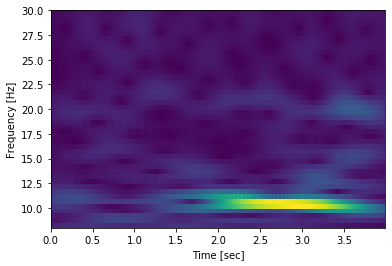

In [ ]:
plt.pcolormesh(time, freqs, x)
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.show()

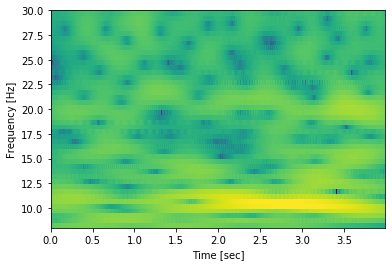

In [ ]:
# imprimir aplicando ln para resaltar el color
# esto no se utilizo en la tesis, es un trabajo futuro
plt.pcolormesh(time, freqs, np.log(x))
plt.xlabel('Time [sec]')
plt.ylabel('Frequency [Hz]')
plt.show()

(45, 512)


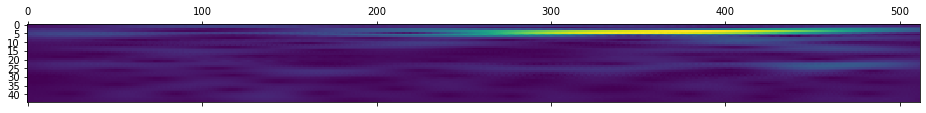

In [ ]:
print(x.shape)
plt.matshow(x)
plt.show()

(22, 256)


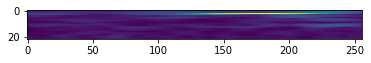

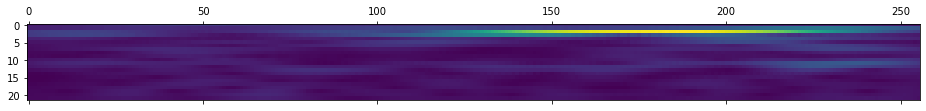

In [ ]:
# resize proporcional de dos con interpolacion inter area
# reducir el tamaño entre 2
dim = (int(np.floor(x.shape[1]/2)), int(np.floor(x.shape[0]/2))) # ancho, alto
resized = cv2.resize(x, dim, interpolation=cv2.INTER_AREA)
print(resized.shape)
plt.imshow(resized)
plt.show()
# otra manera de imprimir la imagen
plt.matshow(resized)
plt.show()

In [ ]:
# ln de CWT, para resaltar los colores
x_log = np.log(resized)

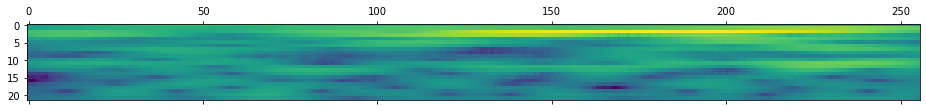

In [ ]:
plt.matshow(x_log)
plt.show()